<h1> Datathon Capgemini </h1>

<h2> Setup </h2>

Abrir archivos csv en un dataset distinto. Crear diccionarios

In [1]:
### Import libraries

import csv
import math
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
import time

- reordenado: si la orden de compra es repetida. 1->sí 0->sí
- incluido_orden_carrito
- id_linea: índice

In [2]:
path = "Tablas/tabla_compras_1.csv"
df_1 = pd.read_csv(path, sep = ';')
df_1

,id_linea,id_orden,id_producto,incluido_orden_carrito,reordenado
0,0,1,49302,1,1
1,1,1,11109,2,1
2,2,1,10246,3,0
3,3,1,49683,4,0
4,4,1,43633,5,1
...,...,...,...,...,...
276918,276918,674669,4957,10,0
276919,276919,674669,11925,11,0
276920,276920,674669,43442,12,0
276921,276921,674669,36116,13,0


In [3]:
path = "Tablas/tabla_compras_2.csv"
df_2 = pd.read_csv(path, sep = ';')
df_2

,id_linea,id_orden,id_producto,incluido_orden_carrito,reordenado
0,276923,674713,27845,2,1
1,276924,674713,1940,3,1
2,276925,674720,19488,1,1
3,276926,674720,1560,2,0
4,276927,674720,35507,3,1
...,...,...,...,...,...
276918,553841,1362011,48600,15,0
276919,553842,1362018,47766,1,1
276920,553843,1362018,24852,2,1
276921,553844,1362018,21927,3,0


In [4]:
path = "Tablas/tabla_compras_3.csv"
df_3 = pd.read_csv(path, sep = ';')
df_3

,id_linea,id_orden,id_producto,incluido_orden_carrito,reordenado
0,553846,1362018,25093,5,0
1,553847,1362018,48595,6,0
2,553848,1362018,40516,7,0
3,553849,1362018,49683,8,1
4,553850,1362018,45007,9,1
...,...,...,...,...,...
276918,830764,2048303,27209,2,1
276919,830765,2048303,432,3,1
276920,830766,2048303,38428,4,1
276921,830767,2048303,26040,5,1


In [5]:
path = "Tablas/tabla_compras_4.csv"
df_4 = pd.read_csv(path, sep = ';')
df_4

,id_linea,id_orden,id_producto,incluido_orden_carrito,reordenado
0,830769,2048303,19604,7,1
1,830770,2048303,15924,8,1
2,830771,2048303,33331,9,1
3,830772,2048303,28199,10,1
4,830773,2048303,5077,11,1
...,...,...,...,...,...
276918,1107687,2737917,49683,4,1
276919,1107688,2737917,44628,5,1
276920,1107689,2737917,39984,6,1
276921,1107690,2737917,17794,7,1


In [6]:
path = "Tablas/tabla_compras_5.csv"
df_5 = pd.read_csv(path, sep = ';')
df_5

,id_linea,id_orden,id_producto,incluido_orden_carrito,reordenado
0,1107692,2737917,44359,9,1
1,1107693,2737917,28574,10,1
2,1107694,2737917,4605,11,0
3,1107695,2737929,44987,1,1
4,1107696,2737929,25535,2,0
...,...,...,...,...,...
276918,1384610,3421063,49235,1,1
276919,1384611,3421063,13565,2,1
276920,1384612,3421063,14233,3,1
276921,1384613,3421063,35548,4,1


In [7]:
path = "Tablas/tabla_departamento.csv"
df_dep = pd.read_csv(path, sep = ';')

df_dep = df_dep.set_index('id_departamento').T.to_dict('list')
df_dep

{1: ['CONGELADOS'],
 2: ['OTROS'],
 3: ['PANADERÍA'],
 4: ['FRUTAS Y VERDURAS'],
 5: ['BEBIDAS ALCOHOLICAS'],
 6: ['INTERNACIONALES'],
 7: ['BEBIDAS'],
 8: ['MASCOTAS'],
 9: ['PASTAS Y PRODUCTOS SECOS'],
 10: ['PRODUCTOS A GRANEL'],
 11: ['CUIDADO PERSONAL'],
 12: ['MARISCOS'],
 13: ['DESPENSA'],
 14: ['DESAYUNO'],
 15: ['PRODUCTOS ENLATADOS'],
 16: ['HUEVOS Y LÁCTEOS'],
 17: ['FAMILIAR'],
 18: ['BEBÉS'],
 19: ['MERIENDAS'],
 20: ['FIAMBRES'],
 21: ['SIN CATALOGAR']}

In [8]:
path = "Tablas/tabla_ordenes_final.csv"
df_or_fin = pd.read_csv(path, sep = ';')
df_or_fin.head()


,id_orden,id_usuario,numero_orden,orden_hora_del_dia,dias_desde_pedido_anterior
0,1,112108,4,10,9
1,36,79431,23,18,30
2,38,42756,6,16,24
3,96,17227,7,20,30
4,98,56463,41,8,14


In [9]:
df_or_fin.sort_values(by='id_orden')

,id_orden,id_usuario,numero_orden,orden_hora_del_dia,dias_desde_pedido_anterior
0,1,112108,4,10,9
1,36,79431,23,18,30
2,38,42756,6,16,24
3,96,17227,7,20,30
4,98,56463,41,8,14
...,...,...,...,...,...
131204,3421049,189544,4,9,3
131205,3421056,83898,13,20,11
131206,3421058,136952,20,18,15
131207,3421063,169679,30,10,4


In [10]:
path = "Tablas/tabla_pasillos.csv"
df_pasillos = pd.read_csv(path, sep = ';')
df_pasillos

df_pasillos = df_pasillos.set_index('id_pasillo').T.to_dict('list')
df_pasillos

{1: ['SOPAS PREPARADAS ENSALADAS'],
 2: ['QUESOS DE ESPECIALIDAD'],
 3: ['BARRAS DE GRANOLA DE ENERGÍA'],
 4: ['ALIMENTOS INSTANTÁNEOS'],
 5: ['PREPARACIÓN DE LA CARNE MARINADOS'],
 6: ['OTROS'],
 7: ['CARNE ENVASADA'],
 8: ['POSTRES DE PANADERÍA'],
 9: ['SALSA PARA PASTA'],
 10: ['UTENSILIOS DE COCINA'],
 11: ['ALERGIAS GRIPE'],
 12: ['PASTA FRESCA'],
 13: ['COMIDAS PREPARADAS'],
 14: ['ALTERNATIVAS DE CARNE TOFU'],
 15: ['MARISCOS ENVASADOS'],
 16: ['HIERBAS FRESCAS'],
 17: ['INGREDIENTES PARA HORNEAR'],
 18: ['FRUTOS SECOS A GRANEL FRUTAS VERDURAS'],
 19: ['ACEITES VINAGRES'],
 20: ['HIGIENE ORAL'],
 21: ['QUESOS ENVASADOS'],
 22: ['CUIDADO DEL CABELLO'],
 23: ['PALOMITAS'],
 24: ['FRUTAS FRESCAS'],
 25: ['JABÓN'],
 26: ['CAFÉ'],
 27: ['CERVEZAS REFRIGERADORES'],
 28: ['VINOS TINTOS'],
 29: ['MIELES JARABES NÉCTARES'],
 30: ['ALIMENTOS LATINOS'],
 31: ['REFRIGERADOS'],
 32: ['PRODUCTOS ENVASADOS'],
 33: ['ALIMENTOS KOSHER'],
 34: ['MARISCOS CARNE CONGELADA'],
 35: ['AVES DE CORRAL']

In [11]:
path = "Tablas/tabla_producto.csv"
df_prod = pd.read_csv(path, sep = ';')
df_prod.head()

,id_producto,nombre_producto,id_pasillo,id_departamento
0,1,GALLETAS DEL EMPAREDADO DEL CHOCOLATE,61,19
1,2,TODAS ESTACIONES DE SALT,104,13
2,3,ROBUSTA DE ORO SIN AZÚCAR TÉ OOLONG,94,7
3,4,SALSA INTELIGENTES ONES FAVORITOS MINI CLÁSICO...,38,1
4,5,EN CUALQUIER MOMENTO SALSA VERDE CHILE,5,13


In [12]:
# ¿Cómo asociar los productos a cada orden? ¿Unificar en una tabla? Añadiendo en las tablas de órdenes buscando la id de la orden e id de usuario

#df_1.filter(np.where(df_1['id_orden'] == df_or_fin))
# np.where(df_1['id_orden'] == df_or_fin['id_orden'])

# Juntar todas las tablas de compras
df_compras = [df_1, df_2, df_3, df_4, df_5]
df_compras = pd.concat(df_compras)

## Reordenar datasets por id de orden
# df_compras.sort_values(by='id_orden')
# df_or_fin.sort_values(by='id_orden')
# Where id orden iguales y poner el id_usuario
# df_or_fin
df_compras

,id_linea,id_orden,id_producto,incluido_orden_carrito,reordenado
0,0,1,49302,1,1
1,1,1,11109,2,1
2,2,1,10246,3,0
3,3,1,49683,4,0
4,4,1,43633,5,1
...,...,...,...,...,...
276918,1384610,3421063,49235,1,1
276919,1384611,3421063,13565,2,1
276920,1384612,3421063,14233,3,1
276921,1384613,3421063,35548,4,1


In [13]:
# Asociar id de usuario a cada orden

df_all = pd.merge(df_compras, df_or_fin, on = 'id_orden')
df_all.head(30)

,id_linea,id_orden,id_producto,incluido_orden_carrito,reordenado,id_usuario,numero_orden,orden_hora_del_dia,dias_desde_pedido_anterior
0,0,1,49302,1,1,112108,4,10,9
1,1,1,11109,2,1,112108,4,10,9
2,2,1,10246,3,0,112108,4,10,9
3,3,1,49683,4,0,112108,4,10,9
4,4,1,43633,5,1,112108,4,10,9
5,5,1,13176,6,0,112108,4,10,9
6,6,1,47209,7,0,112108,4,10,9
7,7,1,22035,8,1,112108,4,10,9
8,8,36,39612,1,0,79431,23,18,30
9,9,36,19660,2,1,79431,23,18,30


In [18]:
# Importar df_all con el número de productos cambiado

df_all_prod = pd.read_csv('Tablas/df_all_prod.csv')
df_all_prod

,id_linea,id_orden,id_producto,incluido_orden_carrito,reordenado,id_usuario,numero_orden,orden_hora_del_dia,dias_desde_pedido_anterior
0,0,1,49302,8,1,112108,4,10,9
1,1,1,11109,8,1,112108,4,10,9
2,2,1,10246,8,0,112108,4,10,9
3,3,1,49683,8,0,112108,4,10,9
4,4,1,43633,8,1,112108,4,10,9
...,...,...,...,...,...,...,...,...,...
1384610,1384610,3421063,49235,4,1,169679,30,10,4
1384611,1384611,3421063,13565,4,1,169679,30,10,4
1384612,1384612,3421063,14233,4,1,169679,30,10,4
1384613,1384613,3421063,35548,4,1,169679,30,10,4


In [17]:
# Importar información estadística de productos y carrito

df_prod_stats = pd.read_csv('Tablas/df_prod_stats.csv')
df_prod_stats

,id_producto,muestras,media,mediana
0,1,76.0,11.434211,8.0
1,2,4.0,21.250000,21.5
2,3,6.0,14.833333,14.0
3,4,22.0,15.590909,13.0
4,5,1.0,13.000000,13.0
...,...,...,...,...
39118,49682,5.0,21.600000,18.0
39119,49683,2413.0,15.882304,14.0
39120,49686,7.0,15.142857,12.0
39121,49687,1.0,5.000000,5.0


In [19]:
# Clasificación o clustering. Siendo X id_usuario id_orden e y id_producto
# Se podría ver que pasillos son los que más frecuenta cada timpo de usuario (haciendo un clustering de los clientes, posiblemente)
# ¿Clustering para designar tipos de usuario? ¿Tener en cuenta días desde el pedido anterior para ver si es frecuente?


# np.where(df_all['id_orden']==36)[0]

In [15]:
# Incluir en df_all el número máximo de productos por orden

'''
df_all_prod = df_all
prod_iter = set(df_all_prod['id_orden'])
prod_iter = list(prod_iter)
prod_iter.sort()

start = time.time()

def find_max_prod(df, k):
    coor = np.where(df['id_orden']==k)[0].tolist()
    return max(df.loc[coor, 'incluido_orden_carrito'])

for x in prod_iter:
    coor = np.where(df_all_prod['id_orden']==x)[0].tolist()
    df_all_prod.loc[coor,'incluido_orden_carrito'] = max(df_all_prod.loc[coor, 'incluido_orden_carrito'])
    # df_all_prod.loc[x,'incluido_orden_carrito'] = find_max_prod(df_all_prod, x)
    # print(x)

end = time.time()
print(end - start)
'''

1535.4623880386353


In [14]:
'''
df_all_prod = pd.read_csv('Tablas/df_all_prod.csv')
df_all_prod.head()

prod_iter = set(df_all_prod['id_producto'])
prod_iter = list(prod_iter)
prod_iter.sort()

df_prod_stats = pd.DataFrame(prod_iter, columns=['id_producto'])
df_prod_stats = df_prod_stats.reindex(columns = df_prod_stats.columns.tolist() + ['muestras','media','mediana'])
k = 0

start = time.time()

for x in prod_iter:
    coor = np.where(df_all_prod['id_producto']==x)[0].tolist()
    df_prod_stats.loc[k, 'muestras'] = len(df_all_prod.loc[coor, 'incluido_orden_carrito'])
    df_prod_stats.loc[k, 'media'] = statistics.mean(df_all_prod.loc[coor, 'incluido_orden_carrito'])
    df_prod_stats.loc[k, 'mediana'] = statistics.median(df_all_prod.loc[coor, 'incluido_orden_carrito'])
    k = k + 1
    # print(x)

end = time.time()
print(end - start)

'''

# len(prod_iter)
# len(df_prod['id_producto'])
    # Hay más productos en el diccionario que en el propio dataframe (posiblemente, hay productos solo disponibles en tienda física o desclasificados)
# Añadir columnas a un dataframe
## mydf = mydf.reindex(columns = mydf.columns.tolist() + ['newcol1','newcol2'])

178.5227324962616


In [15]:
df_prod_stats.head()
df_prod_stats.sort_values(by='mediana', ascending=False)

# Tener en cuenta el número de muestras (hay productos que van en grandes compras, pero solo han sido ordenados una vez).
    # Escoger un número de muestras que sea suficientemente grande para verificar que esos productos sí aumentan la cantidad de productos en el carrito.
    # También se deberán testear la media y la mediana
np.where(df_prod_stats['muestras']>10)


# coor_test = np.where(df_all_prod['id_producto']==2)[0].tolist()
# len(df_all_prod.loc[coor_test, 'incluido_orden_carrito'])

(array([    0,     3,     6, ..., 39114, 39116, 39119], dtype=int64),)

In [16]:
# Guardar los datos en un csv
# df_all_prod.to_csv('df_all_prod.csv', index=False)
# df_prod_stats.to_csv('df_prod_stats.csv', index=False)

In [21]:
df_prod_carrito = df_all_prod[['id_producto', 'incluido_orden_carrito']]
df_prod_carrito

# Expandir dataframe creando columnas nuevas para almacenar la media, la mediana, los cuartiles y alguna cosa más.
    # Es posible que la mediana sea más útil que la media en este caso
# Estaría bien ver los histogramas de los productos más comprados para asegurarse de que es representativo o hacer algún test de representabilidad.

,id_producto,incluido_orden_carrito
0,49302,8
1,11109,8
2,10246,8
3,49683,8
4,43633,8
...,...,...
1384610,49235,4
1384611,13565,4
1384612,14233,4
1384613,35548,4


567.572767496109


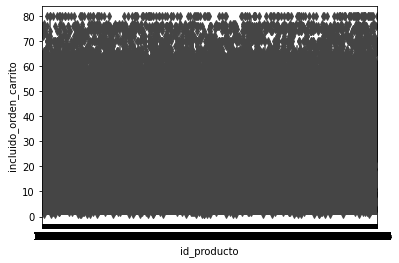

In [22]:
# Box and Whiskers

start = time.time()

ax1 = sns.boxplot(x = "id_producto", y = "incluido_orden_carrito", data=df_prod_carrito)

end = time.time()
print(end - start)

In [15]:
# Clustering jerárquico

from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

# For clustering
X_0 = df_all[['id_usuario', 'id_orden', 'orden_hora_del_dia', 'dias_desde_pedido_anterior', 'id_producto']]
# For classification
X_1 = df_all[['id_usuario', 'id_orden', 'orden_hora_del_dia', 'dias_desde_pedido_anterior']]
y_1 = df_all['id_producto']

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [16]:
import scipy
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_0)

# Problema: no se puede procesar puesto que requiere una capacidad de 6.97 TiB
# Soluciones:
    # Entrenar el clasificador un subset de df_all basados en la id de usuario -> agrupar en cada subset.
    # Emplear otro método de agrupación para determinar los tipos de clientes que existen.
                

MemoryError: Unable to allocate 6.97 TiB for an array with shape (958578656805,) and data type float64

In [ ]:
X_0.dtypes

In [ ]:
len(set(df_all['id_orden']))

In [ ]:
df_all['id_orden'].tail()

In [ ]:
# Detectar los productos que más llenan los carros

# map(print(df_compras['incluido_orden_carrito']), df_compras['incluido_orden_carrito'])

for x in df_compras['incluido_orden_carrito']:
    pass

In [ ]:
df_compras.iloc['1', 'incluido_orden_carrito']